### train.csv - 학습용 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수
﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿

### test.csv - 테스트 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수


### age_gender_info.csv - 지역 임대주택 나이별, 성별 인구 분포

지역
10대미만(여자)
10대미만(남자)
20대(여자)
20대(남자)
30대(여자)
30대(남자)
40대(여자)
40대(남자)
50대(여자)
50대(남자)
60대(여자)
60대(남자)
70대(여자)
70대(남자)
80대(여자)
80대(남자)
90대(여자)
90대(남자)
100대(여자)
100대(남자)


### sample_submission.csv - 제출 양식

- code : 단지 코드
- num : 등록차량수


## 패키지

In [1]:
# pip install catboost

In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
# from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
# import pytagcloud
from IPython.display import Image

# 저장
import pickle

from tqdm import tqdm

## 데이터

In [3]:
train = pd.read_csv('data/train_부산,대구,강원(임대료)_대전,충남(지하철).csv', encoding='cp949')
test = pd.read_csv('data/test_C2152결측채움.csv', encoding='cp949')
submission = pd.read_csv('data/sample_submission.csv')
agegender_info= pd.read_csv('data/age_gender_info.csv')

In [4]:
agegender_info

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,...,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,...,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,...,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,...,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082


- age_gender_info.csv의 분포는 train, test 데이터에만 해당하는 인구 분포입니다.
- age_gender_info.csv는 해당 단지들에 살고있는 모든 인구의 분포입니다.

In [5]:
train.shape, test.shape

((2952, 16), (1022, 15))

In [6]:
train.head()

,Unnamed: 0,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,0,C2483,900,아파트,경상북도,국민임대,39.72,134,38,A,15667000.0,103680,0.0,3.0,1425,1015
1,1,C2483,900,아파트,경상북도,국민임대,39.72,15,38,A,15667000.0,103680,0.0,3.0,1425,1015
2,2,C2483,900,아파트,경상북도,국민임대,51.93,385,38,A,27304000.0,184330,0.0,3.0,1425,1015
3,3,C2483,900,아파트,경상북도,국민임대,51.93,15,38,A,27304000.0,184330,0.0,3.0,1425,1015
4,4,C2483,900,아파트,경상북도,국민임대,51.93,41,38,A,27304000.0,184330,0.0,3.0,1425,1015


In [7]:
train.drop(['Unnamed: 0'], axis=1, inplace= True)

In [8]:
test.drop(['Unnamed: 0'], axis=1, inplace= True)

In [9]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38,A,15667000.0,103680,0.0,3.0,1425,1015
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38,A,15667000.0,103680,0.0,3.0,1425,1015
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38,A,27304000.0,184330,0.0,3.0,1425,1015
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38,A,27304000.0,184330,0.0,3.0,1425,1015
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38,A,27304000.0,184330,0.0,3.0,1425,1015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7,A,11346000.0,116090,0.0,1.0,166,146
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7,A,14005000.0,142310,0.0,1.0,166,146
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7,A,14005000.0,142310,0.0,1.0,166,146
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7,A,14005000.0,142310,0.0,1.0,166,146


In [10]:
train['자격유형'].value_counts()

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

- 공가수 : 비어있는 집

## 결측치 확인

In [11]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    119
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [12]:
## 지하철 버스 공란 변경하기 
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0,inplace=True)
train['도보 10분거리 내 버스정류장 수'].fillna(0,inplace=True)

In [13]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [14]:
## 지하철 버스 공란 변경하기 
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0,inplace=True)
test['도보 10분거리 내 버스정류장 수'].fillna(0,inplace=True)

In [15]:
agegender_info.isna().sum()

지역           0
10대미만(여자)    0
10대미만(남자)    0
10대(여자)      0
10대(남자)      0
20대(여자)      0
20대(남자)      0
30대(여자)      0
30대(남자)      0
40대(여자)      0
40대(남자)      0
50대(여자)      0
50대(남자)      0
60대(여자)      0
60대(남자)      0
70대(여자)      0
70대(남자)      0
80대(여자)      0
80대(남자)      0
90대(여자)      0
90대(남자)      0
100대(여자)     0
100대(남자)     0
dtype: int64

In [16]:
train.shape, train.drop_duplicates().shape # 중복 존재

((2952, 15), (2632, 15))

In [17]:
test.shape, test.drop_duplicates().shape # 중복 존재

((1022, 14), (949, 14))

In [18]:
test.loc[test['임대건물구분']=='상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27,D,NaN,NaN,2.0,5,428
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27,D,NaN,NaN,2.0,5,428
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27,D,NaN,NaN,2.0,5,428
83,C1006,1505,상가,대전광역시,임대상가,37.41,1,27,D,NaN,NaN,2.0,5,428
84,C1006,1505,상가,대전광역시,임대상가,37.41,1,27,D,NaN,NaN,2.0,5,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0,D,NaN,NaN,0.0,5,131
329,C1729,627,상가,강원도,임대상가,34.86,1,0,D,NaN,NaN,0.0,5,131
330,C1729,627,상가,강원도,임대상가,35.76,1,0,D,NaN,NaN,0.0,5,131
331,C1729,627,상가,강원도,임대상가,50.08,1,0,D,NaN,NaN,0.0,5,131


In [19]:
test.loc[test['자격유형']=='D']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27,D,NaN,NaN,2.0,5,428
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27,D,NaN,NaN,2.0,5,428
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27,D,NaN,NaN,2.0,5,428
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27,D,NaN,NaN,2.0,5,428
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27,D,NaN,NaN,2.0,5,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0,D,NaN,NaN,0.0,5,131
329,C1729,627,상가,강원도,임대상가,34.86,1,0,D,NaN,NaN,0.0,5,131
330,C1729,627,상가,강원도,임대상가,35.76,1,0,D,NaN,NaN,0.0,5,131
331,C1729,627,상가,강원도,임대상가,50.08,1,0,D,NaN,NaN,0.0,5,131


### 총세대수

<AxesSubplot:xlabel='총세대수'>

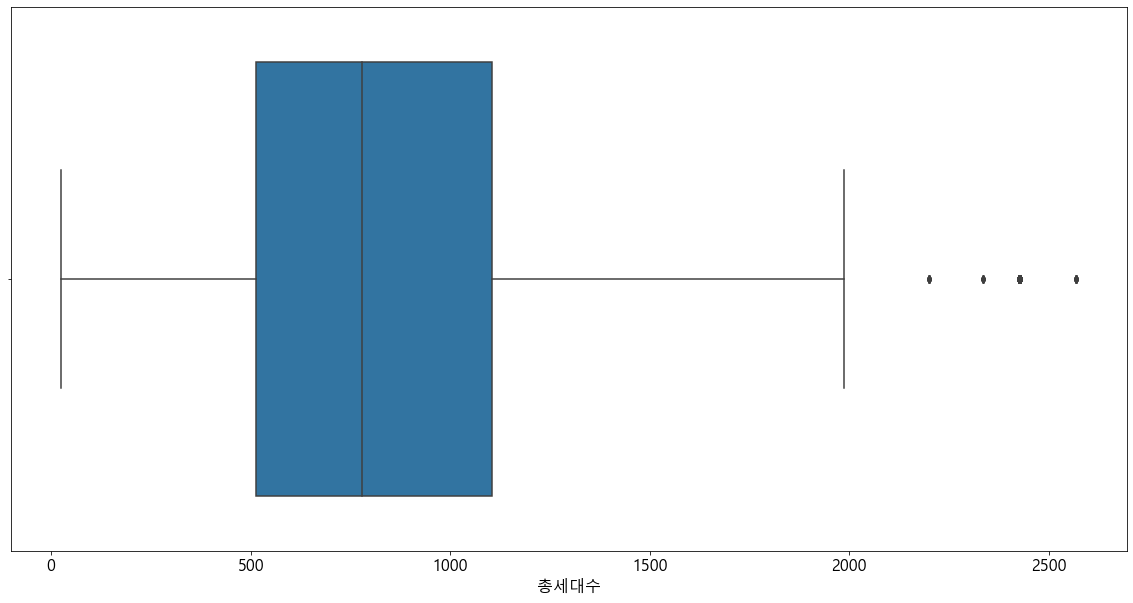

In [20]:
sns.boxplot(train['총세대수'])

In [21]:
train['총세대수'].describe()

count    2952.000000
mean      886.661247
std       513.540168
min        26.000000
25%       513.500000
50%       779.000000
75%      1106.000000
max      2568.000000
Name: 총세대수, dtype: float64

In [22]:
train.loc[train['총세대수']>=2500]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2511,C1363,2568,아파트,경기도,국민임대,26.85,150,11,H,17021000.0,158060,0.0,6.0,1798,2550
2512,C1363,2568,아파트,경기도,국민임대,26.85,88,11,H,17021000.0,158060,0.0,6.0,1798,2550
2513,C1363,2568,아파트,경기도,국민임대,29.92,90,11,H,19451000.0,175260,0.0,6.0,1798,2550
2514,C1363,2568,아파트,경기도,국민임대,29.92,72,11,H,19451000.0,175260,0.0,6.0,1798,2550
2515,C1363,2568,아파트,경기도,국민임대,29.92,340,11,H,19451000.0,175260,0.0,6.0,1798,2550
2516,C1363,2568,아파트,경기도,국민임대,36.96,375,11,H,23892000.0,224730,0.0,6.0,1798,2550
2517,C1363,2568,아파트,경기도,국민임대,36.96,144,11,H,23892000.0,224730,0.0,6.0,1798,2550
2518,C1363,2568,아파트,경기도,국민임대,36.96,45,11,H,23892000.0,224730,0.0,6.0,1798,2550
2519,C1363,2568,아파트,경기도,국민임대,46.49,58,11,H,51763000.0,287090,0.0,6.0,1798,2550
2520,C1363,2568,아파트,경기도,국민임대,46.49,141,11,H,51763000.0,287090,0.0,6.0,1798,2550


<AxesSubplot:xlabel='총세대수'>

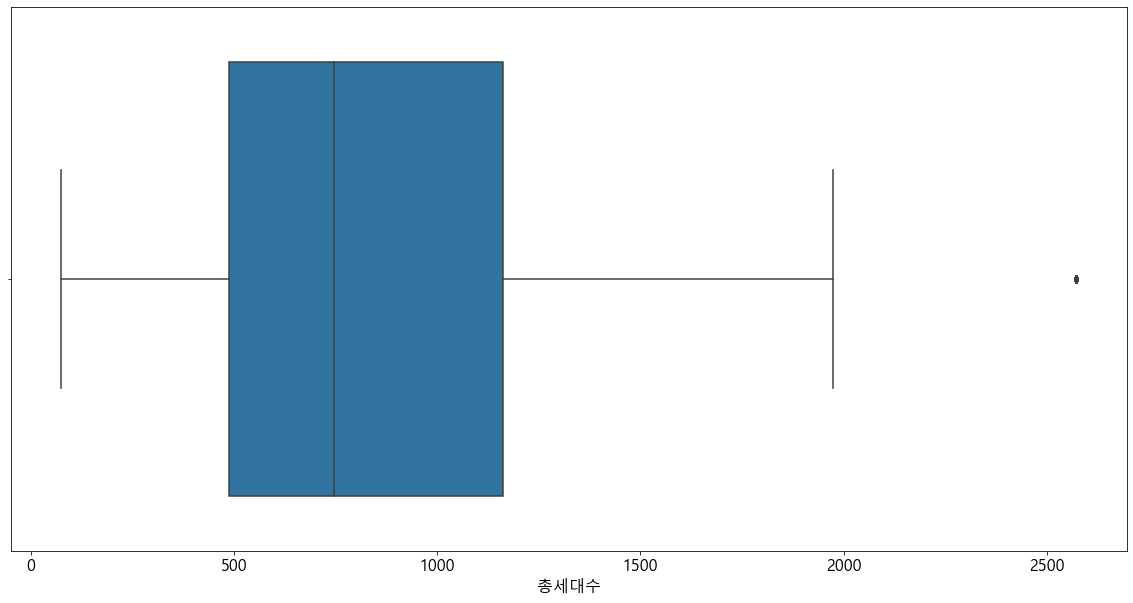

In [23]:
sns.boxplot(test['총세대수'])

In [24]:
test['총세대수'].describe()

count    1022.000000
mean      862.080235
std       536.340894
min        75.000000
25%       488.000000
50%       745.000000
75%      1161.000000
max      2572.000000
Name: 총세대수, dtype: float64

In [25]:
a=test.loc[test['총세대수']>=2500]

In [26]:
a['총세대수'].count()

46

In [27]:
test.loc[test['총세대수']>=2500]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
113,C2676,2572,아파트,부산광역시,영구임대,26.37,294,25,C,5787000,79980,0.0,2,418
114,C2676,2572,아파트,부산광역시,영구임대,26.37,1341,25,C,5787000,79980,0.0,2,418
115,C2676,2572,아파트,부산광역시,영구임대,31.32,894,25,C,6873000,94990,0.0,2,418
116,C2676,2572,상가,부산광역시,임대상가,15.00,1,25,D,NaN,NaN,0.0,2,418
117,C2676,2572,상가,부산광역시,임대상가,15.00,1,25,D,NaN,NaN,0.0,2,418
118,C2676,2572,상가,부산광역시,임대상가,38.00,1,25,D,NaN,NaN,0.0,2,418
119,C2676,2572,상가,부산광역시,임대상가,38.00,1,25,D,NaN,NaN,0.0,2,418
120,C2676,2572,상가,부산광역시,임대상가,16.57,1,25,D,NaN,NaN,0.0,2,418
121,C2676,2572,상가,부산광역시,임대상가,18.38,1,25,D,NaN,NaN,0.0,2,418
122,C2676,2572,상가,부산광역시,임대상가,18.38,1,25,D,NaN,NaN,0.0,2,418


## apps 전처리를 위한 train, test 결합

In [28]:
# pandas의 concat()을 이용하여 app_train과 app_test를 결합
apps = pd.concat([train,test])
apps.shape

(3974, 15)

In [29]:
apps

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38,A,15667000.0,103680,0.0,3.0,1425,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38,A,15667000.0,103680,0.0,3.0,1425,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38,A,27304000.0,184330,0.0,3.0,1425,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38,A,27304000.0,184330,0.0,3.0,1425,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38,A,27304000.0,184330,0.0,3.0,1425,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38,L,-,-,0.0,1.0,467,NaN
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45,H,6872000,106400,0.0,2.0,300,NaN
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45,H,6872000,106400,0.0,2.0,300,NaN
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45,H,13410000,144600,0.0,2.0,300,NaN


## 결측치 확인

In [30]:
apps.isna().sum()

단지코드                               0
총세대수                               0
임대건물구분                             0
지역                                 0
공급유형                               0
전용면적                               0
전용면적별세대수                           0
공가수                                0
자격유형                               2
임대보증금                            749
임대료                              749
도보 10분거리 내 지하철역 수(환승노선 수 반영)       0
도보 10분거리 내 버스정류장 수                 0
단지내주차면수                            0
등록차량수                           1022
dtype: int64

In [31]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          3974 non-null   object 
 1   총세대수                          3974 non-null   int64  
 2   임대건물구분                        3974 non-null   object 
 3   지역                            3974 non-null   object 
 4   공급유형                          3974 non-null   object 
 5   전용면적                          3974 non-null   float64
 6   전용면적별세대수                      3974 non-null   int64  
 7   공가수                           3974 non-null   int64  
 8   자격유형                          3972 non-null   object 
 9   임대보증금                         3225 non-null   object 
 10  임대료                           3225 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  3974 non-null   float64
 12  도보 10분거리 내 버스정류장 수            3974 non-null   float64
 13  단지내

In [32]:
apps['지역'].value_counts()

경기도        880
경상남도       454
부산광역시      416
대전광역시      322
강원도        293
충청북도       214
충청남도       199
전라남도       188
광주광역시      187
경상북도       177
전라북도       150
대구광역시      138
제주특별자치도    117
울산광역시      109
세종특별자치시     66
서울특별시       64
Name: 지역, dtype: int64

In [33]:
apps['임대건물구분'].value_counts()

아파트    3235
상가      739
Name: 임대건물구분, dtype: int64

In [34]:
apps['공급유형'].value_counts()

국민임대         2380
임대상가          739
행복주택          337
공공임대(10년)     240
영구임대          197
공공임대(50년)      44
공공임대(분납)       18
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [35]:
apps['단지내주차면수'].value_counts()

166    71
270    60
756    47
131    46
418    46
       ..
205     2
27      2
420     1
136     1
30      1
Name: 단지내주차면수, Length: 453, dtype: int64

In [36]:
apps['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     1032
3.0      942
4.0      627
1.0      387
5.0      276
6.0      241
8.0      132
7.0      113
10.0      84
12.0      27
15.0      21
16.0      19
20.0      15
11.0      14
50.0       9
14.0       8
19.0       7
18.0       7
0.0        6
17.0       4
13.0       3
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [37]:
apps['자격유형'].value_counts()

A    2373
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64

## 컬럼명 변경

지하쳘역 수와 버스 정류장 수의 컬럼명을 지하철, 버스로 변경하였습니다.

In [38]:
apps.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [39]:
apps.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수'
]

In [40]:
apps['단지코드'].describe()

count      3974
unique      573
top       C1439
freq         48
Name: 단지코드, dtype: object

### 지하철 버스 Nan값 0처리

In [41]:
cols = ['지하철', '버스']
apps[cols] = apps[cols].fillna(0)

### 임대료의 '-'값 Nan값으로 처리

In [42]:
apps.loc[apps['임대보증금']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38,L,-,-,0.0,1.0,467,NaN
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38,L,-,-,0.0,1.0,467,NaN
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38,L,-,-,0.0,1.0,467,NaN
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38,L,-,-,0.0,1.0,467,NaN


In [43]:
apps[apps['단지코드']=='C1267']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
1007,C1267,675,아파트,경상남도,국민임대,24.87,28,38,H,6882000,104370,0.0,1.0,467,NaN
1008,C1267,675,아파트,경상남도,국민임대,24.99,90,38,H,6882000,104370,0.0,1.0,467,NaN
1009,C1267,675,아파트,경상남도,국민임대,24.99,12,38,H,6882000,104370,0.0,1.0,467,NaN
1010,C1267,675,아파트,경상남도,국민임대,46.72,68,38,H,24420000,219230,0.0,1.0,467,NaN
1011,C1267,675,아파트,경상남도,국민임대,46.72,112,38,H,24420000,219230,0.0,1.0,467,NaN
1012,C1267,675,아파트,경상남도,영구임대,22.86,96,38,C,10876000,89230,0.0,1.0,467,NaN
1013,C1267,675,아파트,경상남도,영구임대,22.86,14,38,C,10876000,89230,0.0,1.0,467,NaN
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38,L,-,-,0.0,1.0,467,NaN
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38,L,-,-,0.0,1.0,467,NaN
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38,L,-,-,0.0,1.0,467,NaN


In [44]:
apps.loc[apps['임대보증금']=='-'].index

Int64Index([1014, 1015, 1016, 1017], dtype='int64')

In [45]:
apps['임대보증금'] = apps['임대보증금'].replace('-', 0)

In [46]:
# index로 삭제하면 안된다.
apps[apps['임대보증금']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수


In [47]:
apps.reset_index(drop = True, inplace = True)

In [48]:
# apps = apps.drop(apps.loc[apps['임대보증금']=='-'].index)

In [49]:
# train C1350단지의 자격유형 A 반영을 위한 자격유형 D(이상치?) 처리
apps[(apps['단지코드']=='C1350') & (apps['신분']=='D')].index

Int64Index([2331, 2332, 2333, 2334, 2335, 2336, 2337], dtype='int64')

In [50]:
# train C1350단지의 자격유형 A 반영을 위한 자격유형 D(이상치?) 처리
apps.drop(apps[(apps['단지코드']=='C1350') & (apps['신분']=='D')].index, inplace=True)

In [51]:
apps.loc[apps['임대료']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2043,C1397,370,아파트,서울특별시,장기전세,23.32,51,9,A,87444000.0,-,0.0,3.0,1590,1595.0
2044,C1397,370,아파트,서울특별시,장기전세,46.79,4,9,A,174888000.0,-,0.0,3.0,1590,1595.0
2045,C1397,370,아파트,서울특별시,장기전세,46.91,69,9,A,174888000.0,-,0.0,3.0,1590,1595.0
2046,C1397,370,아파트,서울특별시,장기전세,51.96,24,9,A,194562000.0,-,0.0,3.0,1590,1595.0
2047,C1397,370,아파트,서울특별시,장기전세,51.99,80,9,A,194562000.0,-,0.0,3.0,1590,1595.0
2048,C1397,370,아파트,서울특별시,장기전세,59.93,142,9,A,216423000.0,-,0.0,3.0,1590,1595.0
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13,A,187694000.0,-,0.0,3.0,673,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13,A,213863000.0,-,0.0,3.0,673,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13,A,213863000.0,-,0.0,3.0,673,645.0
3966,C1267,675,아파트,경상남도,행복주택,16.94,50,38,L,0,-,0.0,1.0,467,NaN


In [52]:
# 장기 전세이므로 임대료는 0으로 처리
apps['임대료'] = apps['임대료'].replace('-', 0)

In [53]:
apps.loc[apps['임대료']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수


In [54]:
# 위와 동일한 결과를 볼 수 있다.
# train['임대료'].replace('-', 'nan',inplace = True )

In [55]:
apps.reset_index(drop = True, inplace = True)
apps

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38,A,15667000.0,103680,0.0,3.0,1425,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38,A,15667000.0,103680,0.0,3.0,1425,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38,A,27304000.0,184330,0.0,3.0,1425,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38,A,27304000.0,184330,0.0,3.0,1425,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38,A,27304000.0,184330,0.0,3.0,1425,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,C1267,675,아파트,경상남도,행복주택,36.77,126,38,L,0,0,0.0,1.0,467,NaN
3963,C2189,382,아파트,전라북도,국민임대,29.19,96,45,H,6872000,106400,0.0,2.0,300,NaN
3964,C2189,382,아파트,전라북도,국민임대,29.19,20,45,H,6872000,106400,0.0,2.0,300,NaN
3965,C2189,382,아파트,전라북도,국민임대,39.45,202,45,H,13410000,144600,0.0,2.0,300,NaN


In [56]:
apps['임대료'].value_counts()

79980     23
149810    22
167230    22
187260    22
111470    20
          ..
83370      1
360220     1
169020     1
127540     1
118630     1
Name: 임대료, Length: 1286, dtype: int64

In [57]:
apps['임대보증금'].value_counts()

24775000.0    22
14418000.0    21
5787000.0     18
43000000.0    17
18726000.0    17
              ..
16205000.0     1
19978000.0     1
15690000.0     1
23355000.0     1
43617000.0     1
Name: 임대보증금, Length: 1369, dtype: int64

In [58]:
print(apps[apps['임대보증금'] == '-']['임대보증금'].count())

0


In [59]:
apps['임대보증금'].isnull().sum()

742

#### object 타입을 float 로 바꿔준다.

In [60]:
apps['임대료']=apps['임대료'].astype('float')
apps['임대보증금']=apps['임대보증금'].astype('float')

In [61]:
subway_null_codes = apps[apps['지하철'].isnull()].단지코드.unique()
apps.loc[apps.단지코드.isin(subway_null_codes), '지하철'].value_counts(dropna=False)

Series([], Name: 지하철, dtype: int64)

In [62]:
bus_null_codes = apps[apps['버스'].isnull()].단지코드.unique()
apps.loc[apps.단지코드.isin(bus_null_codes), '버스'].value_counts(dropna=False)

Series([], Name: 버스, dtype: int64)

## 자격유형

In [63]:
apps[apps.신분.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
3141,C2411,962,아파트,경상남도,국민임대,46.90,240,25,NaN,71950000.0,37470.0,0.0,2.0,840,NaN
3203,C2253,1161,아파트,강원도,영구임대,26.37,745,0,NaN,2249000.0,44770.0,0.0,2.0,173,NaN


In [64]:
apps[apps.단지코드=='C2411'] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
3138,C2411,962,아파트,경상남도,국민임대,39.43,56,25,A,11992000.0,100720.0,0.0,2.0,840,NaN
3139,C2411,962,아파트,경상남도,국민임대,39.72,336,25,A,11992000.0,100720.0,0.0,2.0,840,NaN
3140,C2411,962,아파트,경상남도,국민임대,39.82,179,25,A,11992000.0,100720.0,0.0,2.0,840,NaN
3141,C2411,962,아파트,경상남도,국민임대,46.90,240,25,NaN,71950000.0,37470.0,0.0,2.0,840,NaN
3142,C2411,962,아파트,경상남도,국민임대,51.93,150,25,A,21586000.0,171480.0,0.0,2.0,840,NaN


In [65]:
apps.loc[apps.단지코드.isin(['C2411']) & apps.신분.isnull(), '신분'] = 'A'

In [66]:
apps[apps.단지코드=='C2411'] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
3138,C2411,962,아파트,경상남도,국민임대,39.43,56,25,A,11992000.0,100720.0,0.0,2.0,840,NaN
3139,C2411,962,아파트,경상남도,국민임대,39.72,336,25,A,11992000.0,100720.0,0.0,2.0,840,NaN
3140,C2411,962,아파트,경상남도,국민임대,39.82,179,25,A,11992000.0,100720.0,0.0,2.0,840,NaN
3141,C2411,962,아파트,경상남도,국민임대,46.90,240,25,A,71950000.0,37470.0,0.0,2.0,840,NaN
3142,C2411,962,아파트,경상남도,국민임대,51.93,150,25,A,21586000.0,171480.0,0.0,2.0,840,NaN


In [67]:
apps[apps.단지코드=='C2253'].head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
3203,C2253,1161,아파트,강원도,영구임대,26.37,745,0,NaN,2249000.0,44770.0,0.0,2.0,173,NaN
3204,C2253,1161,아파트,강원도,영구임대,31.32,239,0,C,3731000.0,83020.0,0.0,2.0,173,NaN
3205,C2253,1161,아파트,강원도,영구임대,31.32,149,0,C,3731000.0,83020.0,0.0,2.0,173,NaN
3206,C2253,1161,상가,강원도,임대상가,13.77,1,0,D,NaN,NaN,0.0,2.0,173,NaN
3207,C2253,1161,상가,강원도,임대상가,22.89,1,0,D,NaN,NaN,0.0,2.0,173,NaN


In [68]:
apps.loc[apps.단지코드.isin(['C2253']) & apps.신분.isnull(), '신분'] = 'C'

In [69]:
apps[apps.단지코드=='C2253'].head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
3203,C2253,1161,아파트,강원도,영구임대,26.37,745,0,C,2249000.0,44770.0,0.0,2.0,173,NaN
3204,C2253,1161,아파트,강원도,영구임대,31.32,239,0,C,3731000.0,83020.0,0.0,2.0,173,NaN
3205,C2253,1161,아파트,강원도,영구임대,31.32,149,0,C,3731000.0,83020.0,0.0,2.0,173,NaN
3206,C2253,1161,상가,강원도,임대상가,13.77,1,0,D,NaN,NaN,0.0,2.0,173,NaN
3207,C2253,1161,상가,강원도,임대상가,22.89,1,0,D,NaN,NaN,0.0,2.0,173,NaN


## 컬럼추가

### 총세대별주차면수

In [70]:
# apps['총세대별주차면수']=apps['단지내주차면수'] / apps['총세대수']

In [71]:
# apps

### 총세대별등록차량수

In [72]:
# apps['총세대별등록차량수']=apps['단지내주차면수'] / apps['등록차량수']

In [73]:
# apps

## 상가데이터 drop
- 상가 입주민은 주차 공간을 주지않는다.

In [74]:
apps.drop(apps.loc[apps['임대건물구분']== '상가'].index, inplace=True)

In [75]:
apps

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38,A,15667000.0,103680.0,0.0,3.0,1425,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38,A,15667000.0,103680.0,0.0,3.0,1425,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38,A,27304000.0,184330.0,0.0,3.0,1425,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38,A,27304000.0,184330.0,0.0,3.0,1425,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38,A,27304000.0,184330.0,0.0,3.0,1425,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,C1267,675,아파트,경상남도,행복주택,36.77,126,38,L,0.0,0.0,0.0,1.0,467,NaN
3963,C2189,382,아파트,전라북도,국민임대,29.19,96,45,H,6872000.0,106400.0,0.0,2.0,300,NaN
3964,C2189,382,아파트,전라북도,국민임대,29.19,20,45,H,6872000.0,106400.0,0.0,2.0,300,NaN
3965,C2189,382,아파트,전라북도,국민임대,39.45,202,45,H,13410000.0,144600.0,0.0,2.0,300,NaN


In [76]:
apps.loc[apps['임대건물구분']== '아파트']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38,A,15667000.0,103680.0,0.0,3.0,1425,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38,A,15667000.0,103680.0,0.0,3.0,1425,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38,A,27304000.0,184330.0,0.0,3.0,1425,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38,A,27304000.0,184330.0,0.0,3.0,1425,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38,A,27304000.0,184330.0,0.0,3.0,1425,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,C1267,675,아파트,경상남도,행복주택,36.77,126,38,L,0.0,0.0,0.0,1.0,467,NaN
3963,C2189,382,아파트,전라북도,국민임대,29.19,96,45,H,6872000.0,106400.0,0.0,2.0,300,NaN
3964,C2189,382,아파트,전라북도,국민임대,29.19,20,45,H,6872000.0,106400.0,0.0,2.0,300,NaN
3965,C2189,382,아파트,전라북도,국민임대,39.45,202,45,H,13410000.0,144600.0,0.0,2.0,300,NaN


# 이상치 처리

#### 임대료 임대보증금

In [77]:
apps[apps['임대보증금'].isna()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
3021,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27,D,NaN,NaN,2.0,5.0,428,NaN
3022,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27,D,NaN,NaN,2.0,5.0,428,NaN
3024,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27,D,NaN,NaN,2.0,5.0,428,NaN


In [78]:
apps[apps['임대료'].isna()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
3021,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27,D,NaN,NaN,2.0,5.0,428,NaN
3022,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27,D,NaN,NaN,2.0,5.0,428,NaN
3024,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27,D,NaN,NaN,2.0,5.0,428,NaN


In [79]:
apps['임대보증금'].describe()

count    3.225000e+03
mean     2.630802e+07
std      2.037952e+07
min      0.000000e+00
25%      1.444000e+07
50%      2.097100e+07
75%      3.237600e+07
max      2.164230e+08
Name: 임대보증금, dtype: float64

In [80]:
apps['임대보증금']=apps['임대보증금']/10000

In [81]:
apps['임대료']=apps['임대료']/10000

In [82]:
apps['임대보증금'].describe()

count     3225.000000
mean      2630.801898
std       2037.951652
min          0.000000
25%       1444.000000
50%       2097.100000
75%       3237.600000
max      21642.300000
Name: 임대보증금, dtype: float64

<AxesSubplot:xlabel='임대보증금'>

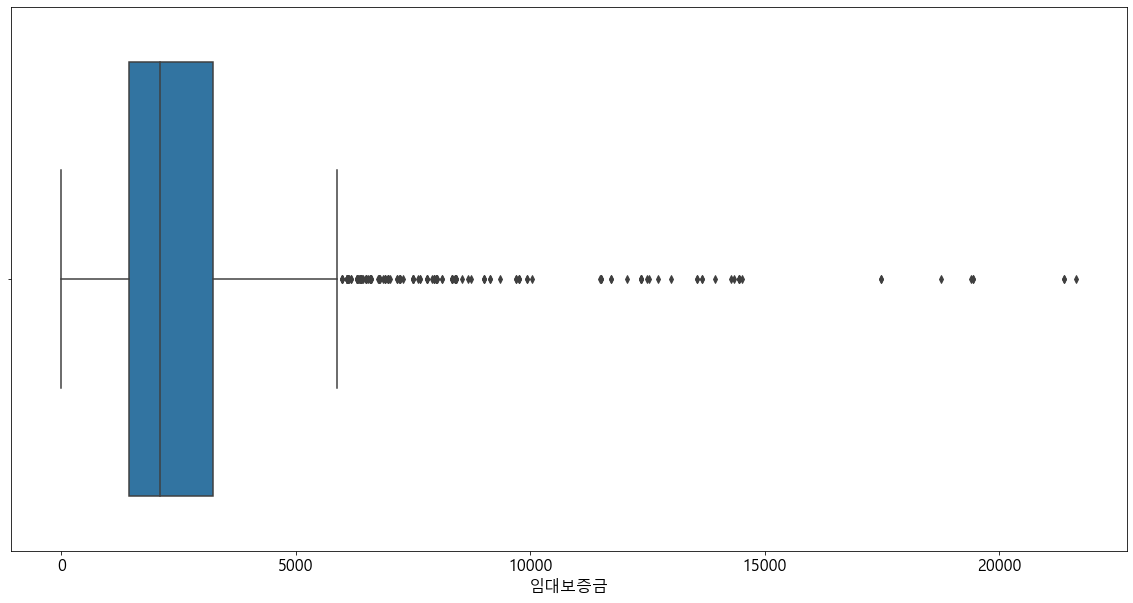

In [83]:
sns.boxplot(apps['임대보증금'])

In [84]:
apps['임대료'].describe()

count    3225.000000
mean       18.999180
std        12.333023
min         0.000000
25%        11.053000
50%        15.806000
75%        23.220000
max       105.803000
Name: 임대료, dtype: float64

<AxesSubplot:xlabel='임대료'>

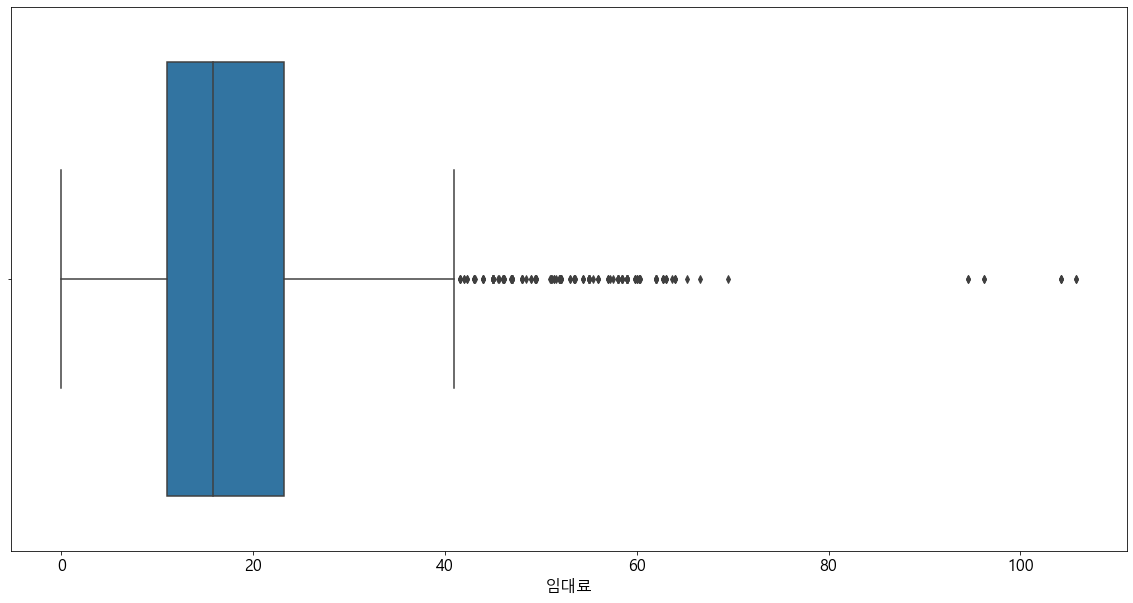

In [85]:
sns.boxplot(apps['임대료'])

In [86]:
apps.loc[apps['임대보증금']>=15000]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2026,C2357,533,아파트,부산광역시,국민임대,51.30,165,25,E,19408.0,10.108,1.0,2.0,484,345.0
2044,C1397,370,아파트,서울특별시,장기전세,46.79,4,9,A,17488.8,0.000,0.0,3.0,1590,1595.0
2045,C1397,370,아파트,서울특별시,장기전세,46.91,69,9,A,17488.8,0.000,0.0,3.0,1590,1595.0
2046,C1397,370,아파트,서울특별시,장기전세,51.96,24,9,A,19456.2,0.000,0.0,3.0,1590,1595.0
2047,C1397,370,아파트,서울특별시,장기전세,51.99,80,9,A,19456.2,0.000,0.0,3.0,1590,1595.0
2048,C1397,370,아파트,서울특별시,장기전세,59.93,142,9,A,21642.3,0.000,0.0,3.0,1590,1595.0
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13,A,18769.4,0.000,0.0,3.0,673,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13,A,21386.3,0.000,0.0,3.0,673,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13,A,21386.3,0.000,0.0,3.0,673,645.0


In [87]:
apps.loc[apps['임대료']>= 80]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2163,C1024,680,아파트,서울특별시,공공임대(10년),74.89,41,2,A,9700.5,94.523,0.0,3.0,877,957.0
2164,C1024,680,아파트,서울특별시,공공임대(10년),74.89,8,2,A,9926.1,96.215,0.0,3.0,877,957.0
2165,C1024,680,아파트,서울특별시,공공임대(10년),74.97,102,2,A,9700.5,94.523,0.0,3.0,877,957.0
2166,C1024,680,아파트,서울특별시,공공임대(10년),74.97,65,2,A,9926.1,96.215,0.0,3.0,877,957.0
2167,C1024,680,아파트,서울특별시,공공임대(10년),84.83,34,2,A,11505.2,104.223,0.0,3.0,877,957.0
2168,C1024,680,아파트,서울특별시,공공임대(10년),84.92,20,2,A,11505.2,104.223,0.0,3.0,877,957.0
2169,C1024,680,아파트,서울특별시,공공임대(10년),84.92,35,2,A,11730.9,105.803,0.0,3.0,877,957.0
2170,C1024,680,아파트,서울특별시,공공임대(10년),84.92,5,2,A,11505.2,104.223,0.0,3.0,877,957.0
2171,C1024,680,아파트,서울특별시,공공임대(10년),84.96,17,2,A,11730.9,105.803,0.0,3.0,877,957.0


In [88]:
a= apps.loc[apps['임대보증금']>=15000]
a['임대보증금'].count()

9

In [89]:
a= apps.loc[apps['임대료']>= 80]
a['임대료'].count()

9

In [90]:
apps.drop(apps.loc[apps['임대보증금']>=15000].index, inplace=True)

In [91]:
apps.drop(apps.loc[apps['임대료']>=80].index, inplace=True)

#### 전용면적

<AxesSubplot:xlabel='전용면적'>

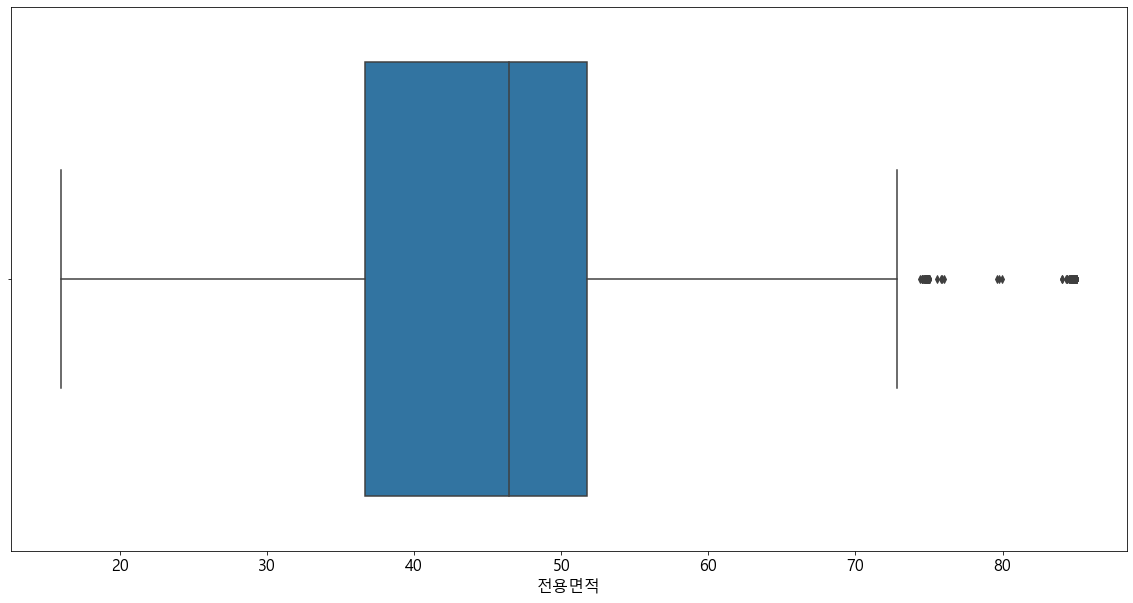

In [92]:
sns.boxplot(apps['전용면적'])

In [93]:
apps['전용면적'].describe()

count    3210.000000
mean       43.899143
std        12.792667
min        16.020000
25%        36.630000
50%        46.470000
75%        51.720000
max        84.990000
Name: 전용면적, dtype: float64

In [94]:
a= apps.loc[apps['전용면적']>=84]
a['공급유형'].value_counts()

공공임대(10년)    77
공공임대(분납)      7
Name: 공급유형, dtype: int64

In [95]:
apps.loc[apps['전용면적']>=80]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
1960,C1344,424,아파트,서울특별시,공공임대(분납),84.95,39,0,A,14354.5,36.384,0.0,3.0,467,509.0
1961,C1344,424,아파트,서울특별시,공공임대(분납),84.97,42,0,A,14526.4,36.819,0.0,3.0,467,509.0
1962,C1344,424,아파트,서울특별시,공공임대(분납),84.99,100,0,A,14274.4,36.180,0.0,3.0,467,509.0
2040,C1804,478,아파트,경기도,공공임대(10년),84.64,4,3,A,9023.7,59.782,0.0,3.0,629,951.0
2041,C1804,478,아파트,경기도,공공임대(10년),84.97,13,3,A,9023.7,59.782,0.0,3.0,629,951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,C2303,963,아파트,경기도,공공임대(10년),84.91,400,16,A,5990.0,54.400,0.0,6.0,1161,NaN
3773,C2303,963,아파트,경기도,공공임대(10년),84.91,150,16,A,5990.0,54.400,0.0,6.0,1161,NaN
3774,C2303,963,아파트,경기도,공공임대(10년),84.91,70,16,A,5990.0,54.400,0.0,6.0,1161,NaN
3787,C1496,565,아파트,충청북도,공공임대(10년),84.64,98,11,A,3560.0,48.000,0.0,3.0,582,NaN


#### 단지내 주차면수

<AxesSubplot:xlabel='단지내주차면수'>

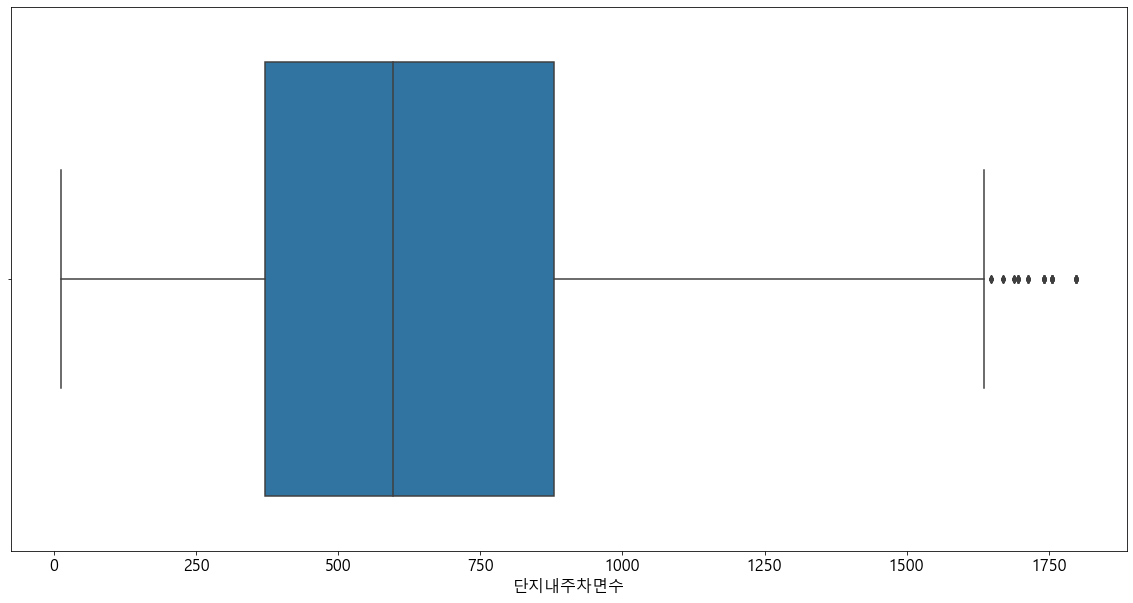

In [96]:
sns.boxplot(apps['단지내주차면수'])

In [97]:
a=apps.loc[apps['단지내주차면수']>=1700]
a['단지내주차면수'].count()

53

In [98]:
apps['단지내주차면수'].describe()

count    3210.000000
mean      656.557321
std       379.557315
min        13.000000
25%       372.000000
50%       596.000000
75%       879.000000
max      1798.000000
Name: 단지내주차면수, dtype: float64

In [99]:
# idx = store[store['단지내주차면수']>=500].index
# store.loc[idx, '전용면적'] = 500

In [100]:
a=apps[apps['단지내주차면수'] >= 1700]
a['단지내주차면수'].mean()

1755.8301886792453

In [101]:
#1700이상 값을 평균값으로 대체
idx = apps[apps['단지내주차면수'] >= 1700].index
apps.loc[idx, '단지내주차면수'] = 1755

In [102]:
apps['단지내주차면수'].describe()

count    3210.000000
mean      656.543614
std       379.499352
min        13.000000
25%       372.000000
50%       596.000000
75%       879.000000
max      1755.000000
Name: 단지내주차면수, dtype: float64

## 전용면적을 10의 배수로 변경

In [103]:
apps['전용면적'].describe()

count    3210.000000
mean       43.899143
std        12.792667
min        16.020000
25%        36.630000
50%        46.470000
75%        51.720000
max        84.990000
Name: 전용면적, dtype: float64

<AxesSubplot:xlabel='전용면적'>

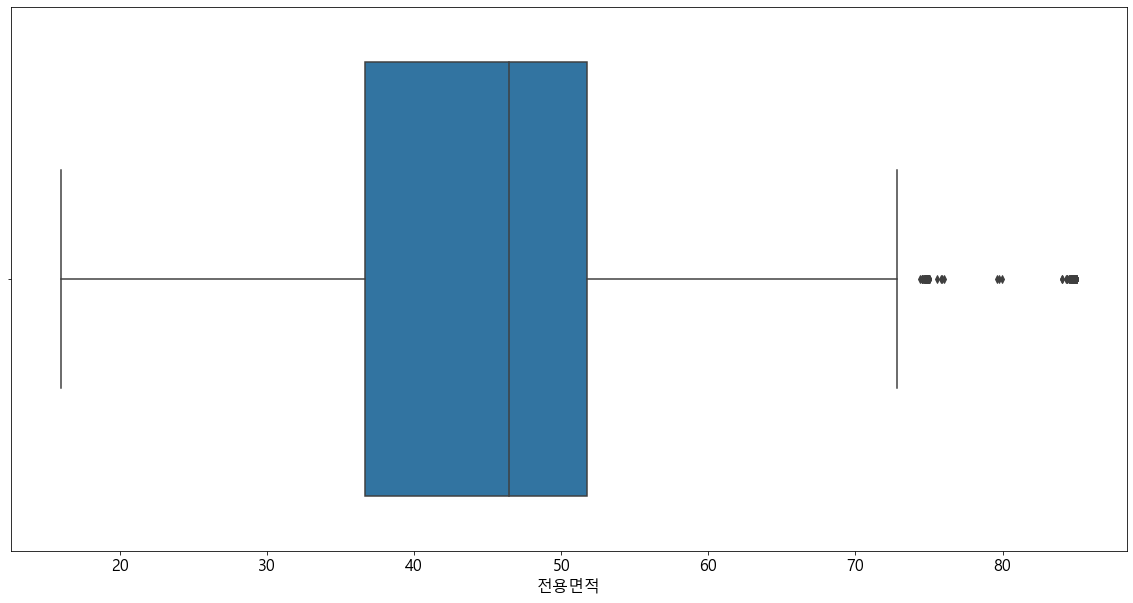

In [104]:
sns.boxplot(apps['전용면적'])

In [105]:
apps.loc[apps['전용면적'] >=80]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
1960,C1344,424,아파트,서울특별시,공공임대(분납),84.95,39,0,A,14354.5,36.384,0.0,3.0,467,509.0
1961,C1344,424,아파트,서울특별시,공공임대(분납),84.97,42,0,A,14526.4,36.819,0.0,3.0,467,509.0
1962,C1344,424,아파트,서울특별시,공공임대(분납),84.99,100,0,A,14274.4,36.180,0.0,3.0,467,509.0
2040,C1804,478,아파트,경기도,공공임대(10년),84.64,4,3,A,9023.7,59.782,0.0,3.0,629,951.0
2041,C1804,478,아파트,경기도,공공임대(10년),84.97,13,3,A,9023.7,59.782,0.0,3.0,629,951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,C2303,963,아파트,경기도,공공임대(10년),84.91,400,16,A,5990.0,54.400,0.0,6.0,1161,NaN
3773,C2303,963,아파트,경기도,공공임대(10년),84.91,150,16,A,5990.0,54.400,0.0,6.0,1161,NaN
3774,C2303,963,아파트,경기도,공공임대(10년),84.91,70,16,A,5990.0,54.400,0.0,6.0,1161,NaN
3787,C1496,565,아파트,충청북도,공공임대(10년),84.64,98,11,A,3560.0,48.000,0.0,3.0,582,NaN


In [106]:
a=apps.loc[apps['전용면적'] >=80]
a['공급유형'].count()

84

In [107]:
a['공급유형'].value_counts()

공공임대(10년)    77
공공임대(분납)      7
Name: 공급유형, dtype: int64

In [108]:
apps['전용면적'] = apps['전용면적']//5*5

In [109]:
apps['전용면적'].unique()

array([35., 50., 55., 30., 45., 40., 25., 70., 80., 75., 20., 65., 15.])

In [110]:
numeric_cols = []
for col in apps.columns:
    if apps[col].dtypes != 'object':
        numeric_cols.append(col)

In [111]:
numeric_cols

['총세대수',
 '전용면적',
 '전용면적별세대수',
 '공가수',
 '임대보증금',
 '임대료',
 '지하철',
 '버스',
 '단지내주차면수',
 '등록차량수']

KeyboardInterrupt: 

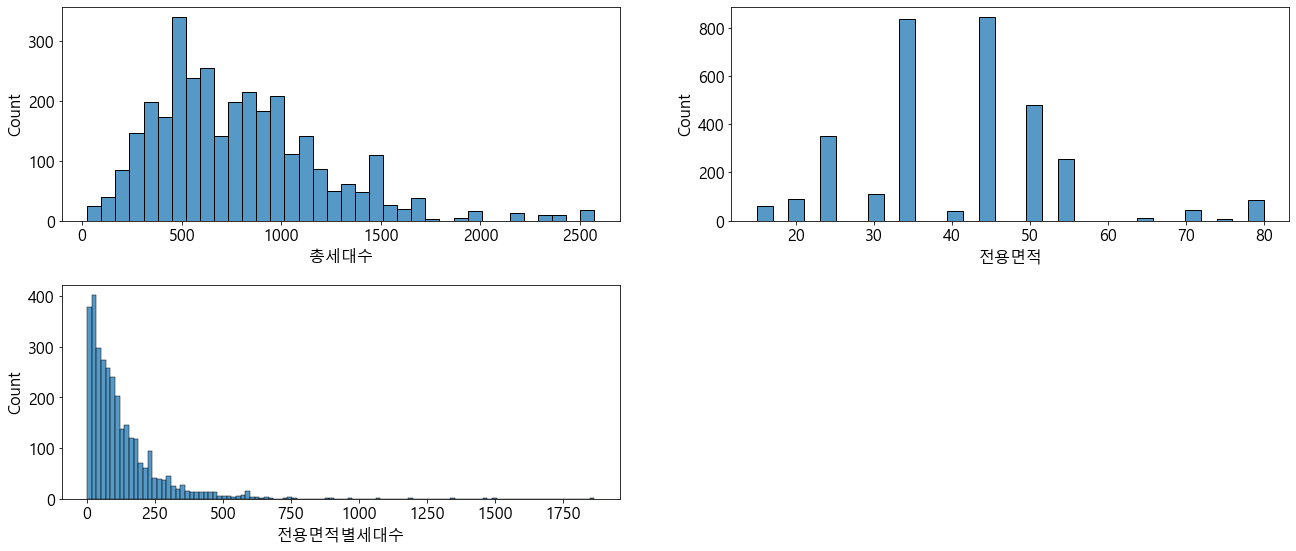

In [112]:
#standard
fig = plt.figure(figsize=(22, 50))
for i, n in enumerate(numeric_cols):
    plt.subplot(10, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(apps[n])

## 전용면적 상/하한 적용

상한100, 하한 15

In [ ]:
# apps['전용면적']

In [ ]:
plt.subplots_adjust(hspace=0.3)
sns.histplot(apps['전용면적'])

In [ ]:
apps['전용면적'].hist()

In [ ]:
sns.boxplot(apps['전용면적'])

In [ ]:
apps['전용면적'].describe()

- max        580
- min         5

In [ ]:
a=apps.loc[apps['전용면적'] <= 15]
a['전용면적'].count()

In [ ]:
b=apps.loc[apps['전용면적']>=80]
b['전용면적'].count()

## label_encoder

In [ ]:
# from sklearn import preprocessing
# label_encoder=preprocessing.LabelEncoder()

In [ ]:
# Label 인코딩을 위해 object 유형의 컬럼만 추출 
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
object_columns

In [ ]:
object_columns.remove('단지코드')

In [ ]:
object_columns

In [ ]:
# pd.factorize()는 한개의 컬럼만 Label 인코딩이 가능하므로 object형 컬럼들을 iteration하면서 변환 수행. 
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [ ]:
apps.info()

## Skewness Kurtosis

In [ ]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["총세대수"])
print("Skewness: {:.3f}".format(apps["총세대수"].skew())) 
print("Kurtosis: {:.3f}".format(apps["총세대수"].kurt()))

In [ ]:
#apps["총세대수"] = np.log1p(apps["총세대수"]) 

#f, ax = plt.subplots(figsize = (10, 6)) 

#sns.distplot(apps["총세대수"]) 

#print("Skewness: {:.3f}".format(apps["총세대수"].skew()))
#print("Kurtosis: {:.3f}".format(apps["총세대수"].kurt()))

- Skewness: -0.866
- Kurtosis: 1.868
- 더 안좋아지는 것 같아서 주석처리함

In [ ]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["공가수"])
print("Skewness: {:.3f}".format(apps["공가수"].skew())) 
print("Kurtosis: {:.3f}".format(apps["공가수"].kurt()))

In [ ]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["임대료"])
print("Skewness: {:.3f}".format(apps["임대료"].skew())) 
print("Kurtosis: {:.3f}".format(apps["임대료"].kurt()))

In [ ]:
# apps["임대료"] = np.log1p(apps["임대료"]) 

# f, ax = plt.subplots(figsize = (10, 6)) 

# sns.distplot(apps["임대료"]) 

# print("Skewness: {:.3f}".format(apps["임대료"].skew()))
# print("Kurtosis: {:.3f}".format(apps["임대료"].kurt()))

In [ ]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["임대보증금"])
print("Skewness: {:.3f}".format(apps["임대보증금"].skew())) 
print("Kurtosis: {:.3f}".format(apps["임대보증금"].kurt()))

In [ ]:
apps["임대보증금"] = np.log1p(apps["임대보증금"]) 

f, ax = plt.subplots(figsize = (10, 6)) 

sns.distplot(apps["임대보증금"]) 

print("Skewness: {:.3f}".format(apps["임대보증금"].skew()))
print("Kurtosis: {:.3f}".format(apps["임대보증금"].kurt()))

In [ ]:
apps["임대료"] = np.log1p(apps["임대료"]) 

f, ax = plt.subplots(figsize = (10, 6)) 

sns.distplot(apps["임대료"]) 

print("Skewness: {:.3f}".format(apps["임대료"].skew()))
print("Kurtosis: {:.3f}".format(apps["임대료"].kurt()))

In [ ]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["단지내주차면수"])
print("Skewness: {:.3f}".format(apps["단지내주차면수"].skew())) 
print("Kurtosis: {:.3f}".format(apps["단지내주차면수"].kurt()))

In [ ]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["전용면적"])
print("Skewness: {:.3f}".format(apps["전용면적"].skew())) 
print("Kurtosis: {:.3f}".format(apps["전용면적"].kurt()))

## Null값 추가처리 필요

In [ ]:
apps.isna().sum()

In [ ]:
apps['임대보증금'] = apps['임대보증금'].fillna(0)

In [ ]:
apps['임대료'] = apps['임대료'].fillna(0)

In [ ]:
apps.isna().sum()

## 등록차량수 Null값을 기준으로 train, test분리

In [ ]:
# -999로 모든 컬럼들의 Null값 변환
apps['등록차량수'] = apps['등록차량수'].fillna(-999)

In [ ]:
# app_test의 TARGET 컬럼은 원래 null이었는데 앞에서 fillna(-999)로 -999로 변환됨. 이를 추출함. 
app_train = apps[apps['등록차량수'] != -999]
app_test = apps[apps['등록차량수']== -999]
app_train.shape, app_test.shape

In [ ]:
# app_test의 TARGET컬럼을 Drop
app_test = app_test.drop('등록차량수', axis=1)

In [ ]:
app_train.shape, app_test.shape

In [ ]:
app_train.isna().sum()

In [ ]:
app_test.isna().sum()

### 상관관계

In [ ]:
corr_columns = ['총세대수',  '전용면적', '전용면적별세대수', '공가수',
    '임대보증금', '지하철', '버스',
    '단지내주차면수','등록차량수']


corr = app_train[corr_columns].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
# plt.savefig('apps_상관관계도_상가drop_보증금평균_외도척도안하면_임대료drop.png')

## 단지별 데이터 1차원으로 취합

In [ ]:
columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스','단지내주차면수']
target = '등록차량수'
area_columns = []
for area in app_train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

In [ ]:
area_columns

In [ ]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

In [ ]:
# train.loc[train['단지코드']=='C2532']

In [ ]:
app_train['임대건물구분'].value_counts()

In [ ]:
app_train.isna().sum()

In [ ]:
len(app_train['단지코드'].unique())

In [ ]:
for i,code in tqdm(enumerate(app_train['단지코드'].unique())):
    temp=app_train[app_train['단지코드']==code]
    temp.index = range(temp.shape[0])
    
    for col in columns:
        new_train.loc[i,col]=temp.loc[0,col]
    for j,area in enumerate(temp['전용면적'].unique()):
        area_temp=temp[temp['전용면적']==area]
        home=0
        for _,k in area_temp.iterrows():
            home = home + k['전용면적별세대수']
        for aa in area_columns:
            area_item = float(aa.split('_')[-1])
            if area_item==area:
                new_train.loc[i,aa]=home
    cal =0
    for _,k in temp.iterrows():
        cal = cal + (k['임대보증금']*k['전용면적별세대수'])
    cal= cal/temp['전용면적별세대수'].sum()
    new_train.loc[i,'임대보증금']=cal
        
    cal =0
    for _,k in temp.iterrows():
        cal = cal + (k['임대료']*k['전용면적별세대수'])
    cal= cal/temp['전용면적별세대수'].sum()
    new_train.loc[i,'임대료']=cal   
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']

    
    
for i,code in tqdm(enumerate(app_test['단지코드'].unique())):
    temp=app_test[app_test['단지코드']==code]
    temp.index = range(temp.shape[0])
    
    for col in columns:
        new_test.loc[i,col]=temp.loc[0,col]
    for j,area in enumerate(temp['전용면적'].unique()):
        area_temp=temp[temp['전용면적']==area]
        home=0
        for _,k in area_temp.iterrows():
            home = home + k['전용면적별세대수']
        for aa in area_columns:
            area_item = float(aa.split('_')[-1])
            if area_item==area:
                new_test.loc[i,aa]=home
    cal =0
    for _,k in temp.iterrows():
        cal = cal + (k['임대보증금']*k['전용면적별세대수'])
    cal= cal/temp['전용면적별세대수'].sum()
    new_test.loc[i,'임대보증금']=cal
    
    
    cal =0
    for _,k in temp.iterrows():
        cal = cal + (k['임대료']*k['전용면적별세대수'])
    cal= cal/temp['전용면적별세대수'].sum()
    new_test.loc[i,'임대료']=cal

In [ ]:
a = new_train['등록차량수']

In [ ]:
a

In [ ]:
new_train.drop(['등록차량수'],axis=1,inplace=True)

In [ ]:
new_train['등록차량수']= a

In [ ]:
new_train

In [ ]:
new_test

In [ ]:
new_train.drop(['전용면적','전용면적별세대수'],axis=1,inplace=True)

In [ ]:
new_train.info()

In [ ]:
new_test.drop(['전용면적','전용면적별세대수'],axis=1,inplace=True)

In [ ]:
new_test.info()

In [ ]:
new_train.shape, new_test.shape

## 결측치 처리

In [ ]:
new_train = new_train.fillna(0)
new_test = new_test.fillna(0)

In [ ]:
new_train

In [ ]:
new_test

## 기본모델 사용

In [ ]:
X = new_train.iloc[:, 1:-1]
y= new_train.iloc[:,-1]
x_test = new_test.iloc[:,1:]

In [ ]:
X.info()

In [ ]:
# new_test[target] = pred.astype(int)
# new_train['type'] = 'train'
# new_test['type'] = 'test'

# data = pd.concat([new_train, new_test])
# data['주차면수대비등록차량비율'] = data['등록차량수']/data['단지내주차면수']
# data['주차면수대비총세대수비율'] = data['총세대수']/ data['단지내주차면수']
# data['거주율'] = 1-(data['공가수']/data['총세대수'])
# data['거주율99%이상'] = data['거주율'].apply(lambda x : 1 if x>=0.95 else 0)

In [ ]:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=data[data['type']=='train']['등록차량수'], name='train', xbins={'size':50}))
# fig.add_trace(go.Histogram(x=data[data['type']=='test']['등록차량수'], name='test', xbins={'size':50}))

# fig.update_layout(barmode='overlay')
# fig.update_traces(opacity=0.75)
# fig.show()

In [ ]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

In [ ]:
# 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 이전에 만든 예제들이 X, y로 사용하고 있기 때문에 변수에 담아준다.
X = X_train
y = y_train

In [ ]:
params = {
    # 이웃의 개수
    'n_neighbors' : list(range(1, 11))
}

model1 = KNeighborsRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf1.best_score_}')

In [ ]:
# CatBoostRegressor 
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.13, 0.15, 0.17, 0.18],
    'n_estimators' : [280, 300, 330, 360, 400, 500],
    'max_depth' : [None, 8, 9, 10]
}

model2 = CatBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf2.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf2.best_score_}')

In [ ]:
# Ridge
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.5, 0.8, 1, 1.2, 1.5]
}

model3 = Ridge()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf3.best_score_}')

In [ ]:
# Lasso
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.5, 0.7, 0.9, 1, 1.2]
}

model4 = Lasso()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf4.best_score_}')

In [ ]:
# ElasticNet
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.007, 0.009, 0.01, 0.012]
}

model5 = ElasticNet()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf5.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf5.best_score_}')

In [ ]:
# SVM(SVR)
# C : 규제의 강도 
params = {
    'C' : [1000, 1100, 1200, 1300, 1400]
}

model6 = SVR()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf6.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf6.best_score_}')

In [ ]:
# max_depth : 최대 질문 생성 깊이
params = {
    'max_depth' : [None, 1, 3, 4]
}

model7 = DecisionTreeRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf7.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf7.best_score_}')

In [ ]:
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'n_estimators' : [230, 240, 250],
    'max_depth' : [None, 1, 2, 3]
}

model8 = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params,scoring = 'r2', cv=kfold)
grid_clf8.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf8.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
params = {
    'learning_rate' : [0.02, 0.025, 0.03, 0.035, 0.04],
    'n_estimators' : [80, 90, 100, 120, 140],
}

model9 = AdaBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf9.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf9.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.15, 0.2, 0.25, 0.3],
    'n_estimators' : [150, 170, 200, 230, 250],
    'max_depth' : [None, 1, 2, 3]
}

model10 = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf10 = GridSearchCV(model10, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf10.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf10.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf10.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.25, 0.27, 0.3, 0.32, 0.35],
    'n_estimators' : [20, 30, 40, 50, 70],
    'max_depth' : [None, 6, 7, 8]
}

model11 = LGBMRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf11 = GridSearchCV(model11, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf11.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf11.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf11.best_score_}')

In [ ]:
# booster : 사용할 알고리즘 종류
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'booster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.04, 0.08, 0.1, 0.12, 0.15],
    'n_estimators' : [ 250, 270, 300, 320, 350],
    'max_depth' : [None, 1, 2, 3, 4]
}

model12 = XGBRegressor(silent=True, verbosity=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf12 = GridSearchCV(model12, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf12.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf12.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf12.best_score_}')

In [ ]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_,
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_,
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_,
    grid_clf10.best_score_,grid_clf11.best_score_, grid_clf12.best_score_,    
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'Catboost', 'Ridge','Lasso','ElasticNet' , 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost','GradientBoost','LGBM','XGBoost'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

## voting

In [ ]:
# 최적의 모델을 생성한다.
best_model1 = grid_clf1.best_estimator_
best_model2 = grid_clf2.best_estimator_
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_
best_model5 = grid_clf5.best_estimator_
best_model6 = grid_clf6.best_estimator_
best_model7 = grid_clf7.best_estimator_
best_model8 = grid_clf8.best_estimator_
best_model9 = grid_clf9.best_estimator_
best_model10 = grid_clf10.best_estimator_
best_model11 = grid_clf11.best_estimator_
best_model12 = grid_clf12.best_estimator_

# 사용할 알고리즘들..
model_list = [
    ('model1', best_model1), ('model2', best_model2), ('model3', best_model3),
    ('model4', best_model4), ('model5', best_model5), ('model6', best_model6),
    ('model7', best_model7), ('model8', best_model8), ('model9', best_model9),
    ('model10', best_model10), ('model11', best_model11),
    ('model12', best_model12)
]

best_model13 = VotingRegressor(estimators=model_list)

In [ ]:
# voting 모델 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(best_model1, X, y, scoring = 'r2', cv=kfold)
r2 = cross_val_score(best_model2, X, y,scoring = 'r2', cv=kfold)
r3 = cross_val_score(best_model3, X, y, scoring = 'r2', cv=kfold)
r4 = cross_val_score(best_model4, X, y, scoring = 'r2', cv=kfold)
r5 = cross_val_score(best_model5, X, y, scoring = 'r2', cv=kfold)
r6 = cross_val_score(best_model6, X, y, scoring = 'r2', cv=kfold)
r7 = cross_val_score(best_model7, X, y, scoring = 'r2', cv=kfold)
r8 = cross_val_score(best_model8, X, y, scoring = 'r2', cv=kfold)
r9 = cross_val_score(best_model9, X, y,scoring = 'r2', cv=kfold)
r10 = cross_val_score(best_model10, X, y, scoring = 'r2', cv=kfold)
r11 = cross_val_score(best_model11, X, y, scoring = 'r2', cv=kfold)
r12 = cross_val_score(best_model12, X, y, scoring = 'r2', cv=kfold)
r13 = cross_val_score(best_model13, X, y,scoring = 'r2', cv=kfold)


In [ ]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    r1.mean(), r2.mean(), r3.mean(),
    r4.mean(), r5.mean(), r6.mean(),
   r7.mean(), r8.mean(), r9.mean(),
    r10.mean(), r11.mean(),r12.mean(),r13.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN','Catboost', 'Ridge','Lasso','ElasticNet' , 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost','GradientBoost','LGBM','XGBoost','Voting'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

In [ ]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0 , 1)

plt.show()

### 학습 데이터를 이용해 평가를 실시한다.

In [ ]:
# 전체 데이터를 학습시킨다.
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)
best_model5.fit(X, y)
best_model6.fit(X, y)
best_model7.fit(X, y)
best_model8.fit(X, y)
best_model9.fit(X, y)
best_model10.fit(X, y)
best_model11.fit(X, y)
best_model12.fit(X, y)
best_model13.fit(X, y)

In [ ]:
# 학습 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)
y_pred5 = best_model5.predict(X)
y_pred6 = best_model6.predict(X)
y_pred7 = best_model7.predict(X)
y_pred8 = best_model8.predict(X)
y_pred9 = best_model9.predict(X)
y_pred10 = best_model10.predict(X)
y_pred11 = best_model11.predict(X)
y_pred12 = best_model12.predict(X)
y_pred13 = best_model13.predict(X)

In [ ]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y.reset_index(drop=True, inplace=True)

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('Catboost')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [ ]:
best_model13

### 최종평가
- 학습하지 않은 데이터를 통한 평가

In [ ]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(x_test)
x_test = scaler1.transform(x_test)
x_test

In [ ]:
x_test = new_test

In [ ]:
x_test['면적_65.0'] = 0.0

In [ ]:
x_test = new_test.iloc[:,1:]
x_test

In [ ]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(x_test)
x_test = scaler1.transform(x_test)
x_test

In [ ]:
# 학습하지 않은 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(x_test)
y_pred2 = best_model2.predict(x_test)
y_pred3 = best_model3.predict(x_test)
y_pred4 = best_model4.predict(x_test)
y_pred5 = best_model5.predict(x_test)
y_pred6 = best_model6.predict(x_test)
y_pred7 = best_model7.predict(x_test)
y_pred8 = best_model8.predict(x_test)
y_pred9 = best_model9.predict(x_test)
y_pred10 = best_model10.predict(x_test)
y_pred11 = best_model11.predict(x_test)
y_pred12 = best_model12.predict(x_test)
y_pred13 = best_model13.predict(x_test)

In [ ]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y_test.reset_index(drop=True, inplace=True)

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('Catboost')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [ ]:
y_pred13_T = best_model13.predict(X_test)

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred13_T, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [ ]:
# # 최적의 하이퍼파라미터가 셋팅된 모델을 받아온다.
# best_model = grid_clf.best_estimator_

# # 학습
# best_model.fit(X, y)

In [ ]:
# model1.fit(x_train, y_train)### 모델 하이퍼 파라미터 튜닝

## 추론 및 제출

In [ ]:
pred1 = best_model1.predict(x_test)
pred2 = best_model2.predict(x_test)
pred3 = best_model3.predict(x_test)
pred4 = best_model4.predict(x_test)
pred5 = best_model5.predict(x_test)
pred6 = best_model6.predict(x_test)
pred7 = best_model7.predict(x_test)
pred8 = best_model8.predict(x_test)
pred9 = best_model9.predict(x_test)
pred10 = best_model10.predict(x_test)
pred11 = best_model11.predict(x_test)
pred12 = best_model12.predict(x_test)
pred13 = best_model13.predict(x_test)

In [ ]:
model_check = pd.DataFrame()

In [ ]:
for i in range(13) :
    model_check[f'pred{i+1}'] = globals()['pred{}'.format(i+1)]

In [ ]:
model_check.rename(columns={'pred1':'KNeighbors', 'pred2':'CatBoost', 'pred3':'Ridge','pred4':'Lasso', 
                           'pred5':'ElasticNet','pred6':'SVR','pred7':'DecisionTree','pred8':'RandomForest', 'pred9':'AdaBoost',
                           'pred10':'GradientBoost','pred11':'LGBM','pred12':'XGBoost', 'pred13':'Voting'}, inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)
model_check

In [ ]:
model_check.plot(figsize = (20, 12))
plt.ylim(-500, 2000)
plt.axhline(y=0, color='r', linewidth=1)

In [ ]:
minus_values = model_check[model_check.values < 0]
minus_values

In [ ]:
asdsadsadsadsa

In [ ]:
submission['num'] = pred

In [ ]:
submission['num']

In [ ]:
submission.to_csv('보증금,임대료평균_상가drop_C1350d드랍_L유형 드랍x_voting.csv', index=False)